In [1]:
import keras
import os
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Activation, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
print("Done!")

Done!


In [2]:
os.getcwd()

'C:\\Users\\vishu\\FSL folder'

In [3]:
# Load of all the .csv files containing extracted image features
data_USG = pd.read_csv("Features/Ultrasound features.csv")
data_MMG = pd.read_csv("Features/Mammogram features.csv")
data_multimodal = pd.read_csv("Features/multimodal features.csv")
print('Done!')

Done!


In [4]:
# to engage the GPU cores
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,2,3,4"
device = os.environ["CUDA_VISIBLE_DEVICES"]
print('Done!')

Done!


In [5]:
#For in hot encoding the labels this tab is required
class_mapping = {
    'B': 0,
    'M': 1,
}
num_classes = 2

label_encoder = LabelEncoder()
data_USG['Class'] = label_encoder.fit_transform(data_USG['Class'])
data_MMG['Class'] = label_encoder.fit_transform(data_MMG['Class'])
data_multimodal['Class'] = label_encoder.fit_transform(data_multimodal['Class'])
print('Done!')

Done!


In [7]:
# Extract features and labels from your preprocessed data
X = data_USG.drop(columns=['Class']).values
y = data_USG['Class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode class labels for binary classification
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Generating a 2-way, n-shot support set
num_classes = 2  # Binary classification
num_support_examples_per_class = 150  # n-shot learning
support_set_X = []
support_set_y = []
for class_label in range(num_classes):
    class_indices = np.where(y_train_encoded == class_label)[0]
    support_indices = np.random.choice(class_indices, num_support_examples_per_class, replace=False)
    support_set_X.extend(X_train[support_indices])
    support_set_y.extend([class_label] * num_support_examples_per_class)

support_set_X = np.array(support_set_X)
support_set_y = np.array(support_set_y)

# Define a simple feedforward neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(512,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))  # Output layer with softmax activation for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the support set
batch_size = 32
epochs = 10
model.fit(support_set_X, support_set_y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test data
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
8/8 [==============================] - 12s 568ms/step - loss: 0.6079 - accuracy: 0.6333 - val_loss: 0.9660 - val_accuracy: 0.0333
Epoch 2/10
8/8 [==============================] - 1s 80ms/step - loss: 0.4699 - accuracy: 0.7958 - val_loss: 0.5894 - val_accuracy: 0.7000
Epoch 3/10
8/8 [==============================] - 1s 77ms/step - loss: 0.3511 - accuracy: 0.8875 - val_loss: 0.2816 - val_accuracy: 0.9667
Epoch 4/10
8/8 [==============================] - 1s 78ms/step - loss: 0.2858 - accuracy: 0.8792 - val_loss: 0.4716 - val_accuracy: 0.7167
Epoch 5/10
8/8 [==============================] - 1s 76ms/step - loss: 0.2150 - accuracy: 0.9333 - val_loss: 0.3464 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 1s 82ms/step - loss: 0.1639 - accuracy: 0.9583 - val_loss: 0.2316 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 1s 88ms/step - loss: 0.1115 - accuracy: 0.9875 - val_loss: 0.1859 - val_accuracy: 0.9667
Epoch 8/10
8/8 [=========

4/4 [==============================] - 2s 19ms/step


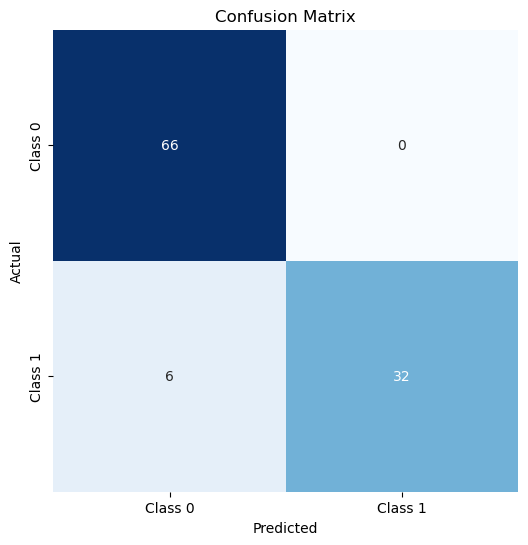

In [8]:
# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Extract features and labels from your preprocessed data
X = data_MMG.drop(columns=['Class']).values
y = data_MMG['Class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode class labels for binary classification
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Generating a 2-way, n-shot support set
num_classes = 2  # Binary classification
num_support_examples_per_class = 150  # n-shot learning
support_set_X = []
support_set_y = []
for class_label in range(num_classes):
    class_indices = np.where(y_train_encoded == class_label)[0]
    support_indices = np.random.choice(class_indices, num_support_examples_per_class, replace=False)
    support_set_X.extend(X_train[support_indices])
    support_set_y.extend([class_label] * num_support_examples_per_class)

support_set_X = np.array(support_set_X)
support_set_y = np.array(support_set_y)

# Define a simple feedforward neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(512,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))  # Output layer with softmax activation for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the support set
batch_size = 32
epochs = 10
model.fit(support_set_X, support_set_y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test data
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
8/8 [==============================] - 14s 638ms/step - loss: 0.6025 - accuracy: 0.6500 - val_loss: 0.6363 - val_accuracy: 0.6833
Epoch 2/10
8/8 [==============================] - 1s 149ms/step - loss: 0.4571 - accuracy: 0.8583 - val_loss: 0.8691 - val_accuracy: 0.3500
Epoch 3/10
8/8 [==============================] - 1s 138ms/step - loss: 0.3552 - accuracy: 0.9167 - val_loss: 0.6107 - val_accuracy: 0.7000
Epoch 4/10
8/8 [==============================] - 1s 156ms/step - loss: 0.2594 - accuracy: 0.9458 - val_loss: 0.5163 - val_accuracy: 0.7667
Epoch 5/10
8/8 [==============================] - 1s 180ms/step - loss: 0.1905 - accuracy: 0.9583 - val_loss: 0.4687 - val_accuracy: 0.7833
Epoch 6/10
8/8 [==============================] - 1s 189ms/step - loss: 0.1295 - accuracy: 0.9792 - val_loss: 0.1650 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 1s 146ms/step - loss: 0.1219 - accuracy: 0.9708 - val_loss: 0.2441 - val_accuracy: 0.9000
Epoch 8/10
8/8 [===

4/4 [==============================] - 1s 25ms/step


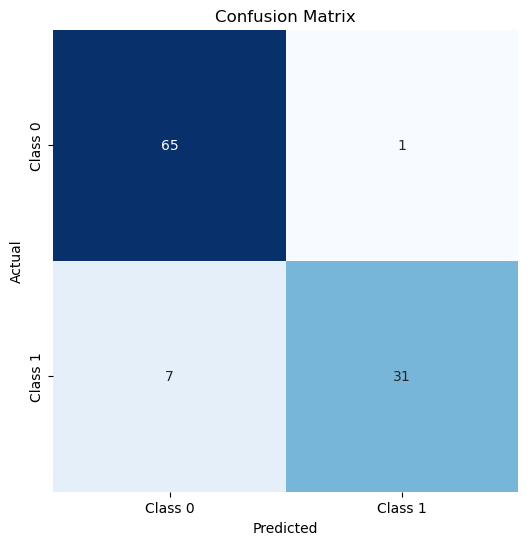

In [10]:
# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Extract features and labels from your preprocessed data
X = data_multimodal.drop(columns=['Class']).values
y = data_multimodal['Class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Encode class labels for binary classification
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Generating a 2-way, n-shot support set
num_classes = 2  # Binary classification
num_support_examples_per_class = 300  # n-shot learning
support_set_X = []
support_set_y = []
for class_label in range(num_classes):
    class_indices = np.where(y_train_encoded == class_label)[0]
    support_indices = np.random.choice(class_indices, num_support_examples_per_class, replace=True)
    support_set_X.extend(X_train[support_indices])
    support_set_y.extend([class_label] * num_support_examples_per_class)

support_set_X = np.array(support_set_X)
support_set_y = np.array(support_set_y)

# Define a simple feedforward neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(1024,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))  # Output layer with softmax activation for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the support set
batch_size = 32
epochs = 10
model.fit(support_set_X, support_set_y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test data
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
15/15 [==============================] - 13s 298ms/step - loss: 0.6056 - accuracy: 0.6354 - val_loss: 0.4384 - val_accuracy: 0.9083
Epoch 2/10
15/15 [==============================] - 1s 73ms/step - loss: 0.3372 - accuracy: 0.8896 - val_loss: 0.5675 - val_accuracy: 0.7250
Epoch 3/10
15/15 [==============================] - 1s 80ms/step - loss: 0.1485 - accuracy: 0.9729 - val_loss: 0.1144 - val_accuracy: 0.9833
Epoch 4/10
15/15 [==============================] - 1s 70ms/step - loss: 0.0583 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9833
Epoch 5/10
15/15 [==============================] - 2s 122ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 1s 73ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 0.9833
Epoch 7/10
15/15 [==============================] - 1s 74ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 0.9833
Epoch 8/10

7/7 [==============================] - 2s 58ms/step


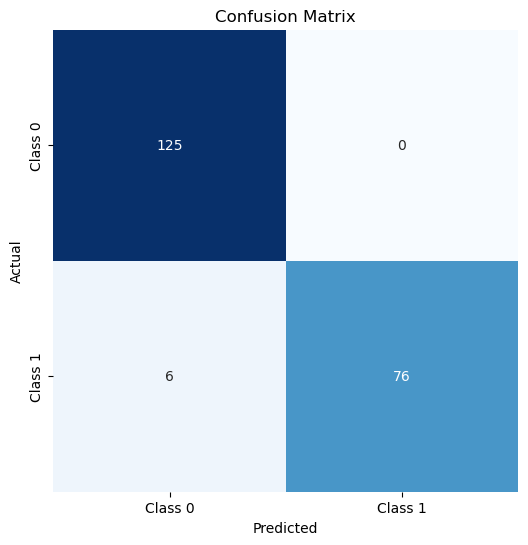

In [12]:
# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()